In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('valorant.sqlite')

# Load data from the database into a pandas DataFrame
# Using the table names based on the dataset structure from Kaggle
# Reference: https://www.kaggle.com/datasets/visualize25/valorant-pro-matches-full-data
query_matches = "SELECT * FROM Matches"
query_game = "SELECT * FROM Games"
query_game_rounds = "SELECT * FROM Game_Rounds"
query_game_scoreboard = "SELECT * FROM Game_Scoreboard"

df_matches = pd.read_sql_query(query_matches, conn)
df_game = pd.read_sql_query(query_game, conn)
df_game_rounds = pd.read_sql_query(query_game_rounds, conn)
df_game_scoreboard = pd.read_sql_query(query_game_scoreboard, conn)

# Close the connection
conn.close()

C:\Users\12406\AppData\Local\Temp\ipykernel_35412\3982921512.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_game_rounds.head()

,GameID,Team1ID,Team2ID,RoundHistory
0,60894,6903,6020,"{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':..."
1,60895,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
2,60896,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
3,60924,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."
4,60925,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."


In [3]:
df_game_rounds.iloc[0]["RoundHistory"]

"{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '1-0', 'WinType': 'elim', 'Team1Bank': 300.0, 'Team2Bank': 100.0, 'Team1BuyType': 'eco', 'Team2BuyType': 'eco'}, 2: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '2-0', 'WinType': 'elim', 'Team1Bank': 2700.0, 'Team2Bank': 8600.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'eco'}, 3: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '3-0', 'WinType': 'elim', 'Team1Bank': 12300.0, 'Team2Bank': 400.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'full-buy'}, 4: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '4-0', 'WinType': 'elim', 'Team1Bank': 23600.0, 'Team2Bank': 9800.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'semi-eco'}, 5: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-1', 'WinType': 'boom', 'Team1Bank': 24200.0, 'Team2Bank': 3300.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'full-buy'}, 6: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-2', 'WinType': 'boom', 'Team1Bank': 10200.0, 'Team2Bank': 10300.0, 'Team1BuyType': 'full-buy', 'Team2BuyType'

In [4]:
df_game_rounds.iloc[1]["RoundHistory"]

"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '0-1', 'WinType': 'elim', 'Team1Bank': 200.0, 'Team2Bank': 400.0, 'Team1BuyType': 'eco', 'Team2BuyType': 'eco'}, 2: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '0-2', 'WinType': 'elim', 'Team1Bank': 8300.0, 'Team2Bank': 1700.0, 'Team1BuyType': 'eco', 'Team2BuyType': 'semi-buy'}, 3: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '1-2', 'WinType': 'defuse', 'Team1Bank': 500.0, 'Team2Bank': 13600.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'semi-buy'}, 4: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '1-3', 'WinType': 'boom', 'Team1Bank': 3900.0, 'Team2Bank': 3100.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'full-buy'}, 5: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '1-4', 'WinType': 'elim', 'Team1Bank': 8900.0, 'Team2Bank': 7000.0, 'Team1BuyType': 'semi-eco', 'Team2BuyType': 'full-buy'}, 6: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '1-5', 'WinType': 'elim', 'Team1Bank': 1700.0, 'Team2Bank': 23000.0, 'Team1BuyType': 'full-buy', 'Team2BuyType':

In [5]:
all_rounds = {}
for i in range(2):
    round_history_str = df_game_rounds.iloc[i]["RoundHistory"]
    if not round_history_str:
        continue
    corrected_str = round_history_str.replace("'", '"')
    rounds = eval(corrected_str)

    for j, round in rounds.items():
        all_rounds[f"Match_{i+1}, Round_{j+1}"] = round
print(all_rounds)
print(type(all_rounds))


{'Match_1, Round_2': {'RoundWinner': 'BOOS', 'ScoreAfterRound': '1-0', 'WinType': 'elim', 'Team1Bank': 300.0, 'Team2Bank': 100.0, 'Team1BuyType': 'eco', 'Team2BuyType': 'eco'}, 'Match_1, Round_3': {'RoundWinner': 'BOOS', 'ScoreAfterRound': '2-0', 'WinType': 'elim', 'Team1Bank': 2700.0, 'Team2Bank': 8600.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'eco'}, 'Match_1, Round_4': {'RoundWinner': 'BOOS', 'ScoreAfterRound': '3-0', 'WinType': 'elim', 'Team1Bank': 12300.0, 'Team2Bank': 400.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'full-buy'}, 'Match_1, Round_5': {'RoundWinner': 'BOOS', 'ScoreAfterRound': '4-0', 'WinType': 'elim', 'Team1Bank': 23600.0, 'Team2Bank': 9800.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'semi-eco'}, 'Match_1, Round_6': {'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-1', 'WinType': 'boom', 'Team1Bank': 24200.0, 'Team2Bank': 3300.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'full-buy'}, 'Match_1, Round_7': {'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-2', 'Win

In [6]:
import pandas as pd

winner_bank = []
loser_bank = []
winner_buy = []

for round_number, details in all_rounds.items():
    
    print(details)
    print(type(details))
    if details['RoundWinner'].strip() == 'BOOS':
        winner_bank.append(details['Team1Bank'])
        loser_bank.append(details['Team2Bank'])
        winner_buy.append(details['Team1BuyType'])
    else:
        winner_bank.append(details['Team2Bank'])
        loser_bank.append(details['Team1Bank'])
        winner_buy.append(details['Team2BuyType'])

rounds_df = pd.DataFrame({
    'WinnerBank': winner_bank,
    'LoserBank': loser_bank,
    'WinnerBuy': winner_buy
})

print(rounds_df)



{'RoundWinner': 'BOOS', 'ScoreAfterRound': '1-0', 'WinType': 'elim', 'Team1Bank': 300.0, 'Team2Bank': 100.0, 'Team1BuyType': 'eco', 'Team2BuyType': 'eco'}
<class 'dict'>
{'RoundWinner': 'BOOS', 'ScoreAfterRound': '2-0', 'WinType': 'elim', 'Team1Bank': 2700.0, 'Team2Bank': 8600.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'eco'}
<class 'dict'>
{'RoundWinner': 'BOOS', 'ScoreAfterRound': '3-0', 'WinType': 'elim', 'Team1Bank': 12300.0, 'Team2Bank': 400.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'full-buy'}
<class 'dict'>
{'RoundWinner': 'BOOS', 'ScoreAfterRound': '4-0', 'WinType': 'elim', 'Team1Bank': 23600.0, 'Team2Bank': 9800.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'semi-eco'}
<class 'dict'>
{'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-1', 'WinType': 'boom', 'Team1Bank': 24200.0, 'Team2Bank': 3300.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'full-buy'}
<class 'dict'>
{'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-2', 'WinType': 'boom', 'Team1Bank': 10200.0, 'Team2Bank': 1

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X = rounds_df[['WinnerBank', 'LoserBank']]
y = rounds_df['WinnerBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

    full-buy       1.00      0.80      0.89         5
    semi-buy       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7



In [8]:
print(y_pred)

['full-buy' 'semi-buy' 'full-buy' 'semi-buy' 'semi-buy' 'full-buy'
 'full-buy']


c:\Users\12406\anaconda3\envs\127hw4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


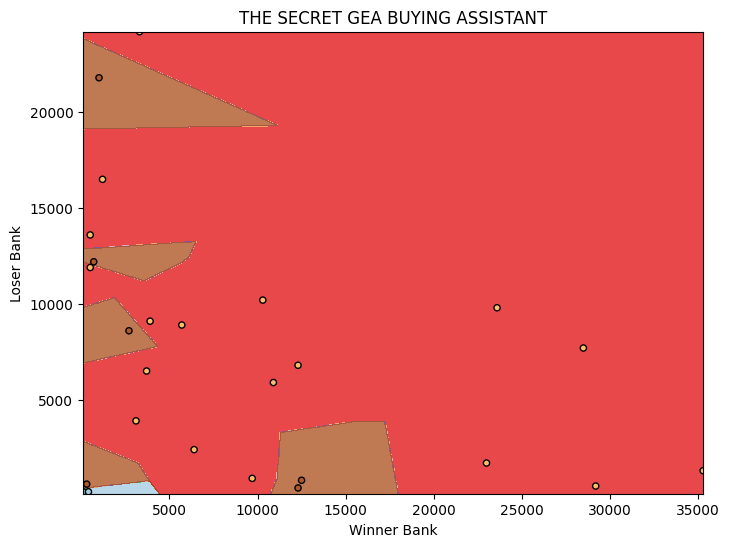

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, scaler, original_X, steps=1000, cmap='Paired'):
    x_min, x_max = original_X[:, 0].min() - 1, original_X[:, 0].max() + 1
    y_min, y_max = original_X[:, 1].min() - 1, original_X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps), np.linspace(y_min, y_max, steps))
    
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    
    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    unique_classes = np.unique(y)
    class_to_int = {k: v for v, k in enumerate(unique_classes)}
    Z_numeric = np.vectorize(class_to_int.get)(Z)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=cmap)
    y_numeric = np.vectorize(class_to_int.get)(y)
    plt.scatter(original_X[:, 0], original_X[:, 1], c=y_numeric, s=20, edgecolor='k', cmap=cmap)
    plt.xlabel('Winner Bank')
    plt.ylabel('Loser Bank')
    plt.title('THE SECRET GEA BUYING ASSISTANT')
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, knn, scaler, X_train.values)
